# Analyzing Customer Footfall Patterns Using Sensor Data

Assume that a small supermarket owner wants to study the number of people that come to the store for shopping each day. The supermarket is equipped with sensors that can record the number of customers in the shop at any given time. Suppose that the data in the attached Excel sheet ("Customers.xlsx") shows the number of customers recorded at particular points in time over 30-day period in January 2023.
Your task in this exercise is to do the following:
1. Write a program that creates three new variables/columns called “day”, “hour”, and “period”, from the “date_time” column. These should respectively include, the day, hour, and period in which the store sensors captured the number of customers.

2. Explore the data numerically (using appropriate statistical measures with Pandas) and visually (using appropriate visualization plots with Seaborn) to understand customer shopping patterns, i.e., how the number of customers is related to the day of the week, the hour of the day, and the time period. Interprett obtained numerical and visual insights.

In [20]:
import pandas as pd #Pandas library, which is used to create and manipulate DataFrames
import datetime #datetime library, which is used to manipulate date and time values

df = pd.read_excel('customers.xlsx') #reads the Excel file customers.xlsx into a Pandas DataFrame
df.head()

,date_time,No_of_customers,day,hour,period
0,2023-01-01 12:04:34,123,Sun,12,PM
1,2023-01-02 12:30:36,126,Mon,12,PM
2,2023-01-03 13:04:39,148,Tue,13,PM
3,2023-01-04 13:30:36,170,Wed,13,PM
4,2023-01-05 14:03:38,189,Thu,14,PM


In [21]:
df['day'] = df['date_time'].dt.strftime('%A').str[:3] 

#create 'day' column, format the date and time values in a DataFrame date_time to the abbreviated day name, only take first 3 characters of day name

df['hour']=df['date_time'].dt.hour #create 'day' column, input date_time's hour

def dperiod(hour): #dperiod() function takes an hour as input and returns the corresponding period (AM or PM)
    if hour<12:
        return 'AM'
    else:
        return 'PM'
    
df['period']=df['hour'].apply(dperiod) #applies the dperiod() function to the hour column in the DataFrame, create 'period' column
df.to_excel('customers.xlsx', index=False)
df.head()

,date_time,No_of_customers,day,hour,period
0,2023-01-01 12:04:34,123,Sun,12,PM
1,2023-01-02 12:30:36,126,Mon,12,PM
2,2023-01-03 13:04:39,148,Tue,13,PM
3,2023-01-04 13:30:36,170,Wed,13,PM
4,2023-01-05 14:03:38,189,Thu,14,PM


In [22]:
# Change the index of the data
df.set_index("date_time", inplace = True)
df.head()

,No_of_customers,day,hour,period
date_time,,,,
2023-01-01 12:04:34,123,Sun,12,PM
2023-01-02 12:30:36,126,Mon,12,PM
2023-01-03 13:04:39,148,Tue,13,PM
2023-01-04 13:30:36,170,Wed,13,PM
2023-01-05 14:03:38,189,Thu,14,PM


# Calculate the mean, median, maximum, minimum, variance and standard deviation of the number of customers

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
# Calculate basic statistics
df.describe()

,No_of_customers,hour
count,30.000000,30.000000
mean,143.100000,12.300000
std,42.911577,2.692903
min,54.000000,8.000000
25%,123.750000,10.250000
50%,148.500000,13.000000
75%,171.750000,14.000000
max,209.000000,16.000000


In [25]:
# Calculate the mean number of customers per day of the week
mean_customers_per_day_of_week = df.groupby('day')['No_of_customers'].mean()

# Calculate the mean number of customers per hour of the day
mean_customers_per_hour_of_day = df.groupby('hour')['No_of_customers'].mean()

# Calculate the mean number of customers per time period
mean_customers_per_time_period = df.groupby('period')['No_of_customers'].mean()

# Print the results
print('Mean number of customers per day of the week:')
print(mean_customers_per_day_of_week)

print('Mean number of customers per hour of the day:')
print(mean_customers_per_hour_of_day)

print('Mean number of customers per time period:')
print(mean_customers_per_time_period)

Mean number of customers per day of the week:
day
Fri    136.25
Mon    136.00
Sat    139.75
Sun    139.60
Thu    155.00
Tue    148.00
Wed    149.75
Name: No_of_customers, dtype: float64
Mean number of customers per hour of the day:
hour
8     133.000000
9      60.666667
10     73.000000
11    116.333333
12    132.666667
13    162.000000
14    190.000000
15    174.666667
16    159.250000
Name: No_of_customers, dtype: float64
Mean number of customers per time period:
period
AM    103.272727
PM    166.157895
Name: No_of_customers, dtype: float64


In [26]:
# Calculate the median number of customers per day of the week
med_customers_per_day_of_week = df.groupby('day')['No_of_customers'].median()

# Calculate the median number of customers per hour of the day
med_customers_per_hour_of_day = df.groupby('hour')['No_of_customers'].median()

# Calculate the median number of customers per time period
med_customers_per_time_period = df.groupby('period')['No_of_customers'].median()

# Print the results
print('Median number of customers per day of the week:')
print(med_customers_per_day_of_week)

print('Median number of customers per hour of the day:')
print(med_customers_per_hour_of_day)

print('Median number of customers per time period:')
print(med_customers_per_time_period)

Median number of customers per day of the week:
day
Fri    143.0
Mon    126.0
Sat    144.0
Sun    130.0
Thu    149.0
Tue    160.0
Wed    158.0
Name: No_of_customers, dtype: float64
Median number of customers per hour of the day:
hour
8     131.5
9      63.0
10     73.0
11    113.0
12    126.0
13    164.5
14    189.0
15    161.0
16    158.5
Name: No_of_customers, dtype: float64
Median number of customers per time period:
period
AM    113.0
PM    170.0
Name: No_of_customers, dtype: float64


In [27]:
# Calculate the minimum number of customers per day of the week
min_customers_per_day_of_week = df.groupby('day')['No_of_customers'].min()

# Calculate the minimum number of customers per hour of the day
min_customers_per_hour_of_day = df.groupby('hour')['No_of_customers'].min()

# Calculate the minimum number of customers per time period
min_customers_per_time_period = df.groupby('period')['No_of_customers'].min()

# Print the results
print('Minimum number of customers per day of the week:')
print(min_customers_per_day_of_week)

print('Minimum number of customers per hour of the day:')
print(min_customers_per_hour_of_day)

print('Minimum number of customers per time period:')
print(min_customers_per_time_period)

Minimum number of customers per day of the week:
day
Fri     54
Mon     73
Sat     63
Sun     65
Thu    133
Tue     92
Wed    113
Name: No_of_customers, dtype: int64
Minimum number of customers per hour of the day:
hour
8     114
9      54
10     73
11     92
12    123
13    148
14    172
15    154
16    129
Name: No_of_customers, dtype: int64
Minimum number of customers per time period:
period
AM     54
PM    123
Name: No_of_customers, dtype: int64


In [28]:
# Calculate the maximum number of customers per day of the week
max_customers_per_day_of_week = df.groupby('day')['No_of_customers'].max()

# Calculate the maximum number of customers per hour of the day
max_customers_per_hour_of_day = df.groupby('hour')['No_of_customers'].max()

# Calculate the maximum number of customers per time period
max_customers_per_time_period = df.groupby('period')['No_of_customers'].max()

# Print the results
print('Maximum number of customers per day of the week:')
print(max_customers_per_day_of_week)

print('Maximum number of customers per hour of the day:')
print(max_customers_per_hour_of_day)

print('Maximum number of customers per time period:')
print(max_customers_per_time_period)

Maximum number of customers per day of the week:
day
Fri    205
Mon    191
Sat    208
Sun    209
Thu    189
Tue    180
Wed    170
Name: No_of_customers, dtype: int64
Maximum number of customers per hour of the day:
hour
8     155
9      65
10     73
11    144
12    149
13    171
14    208
15    209
16    191
Name: No_of_customers, dtype: int64
Maximum number of customers per time period:
period
AM    155
PM    209
Name: No_of_customers, dtype: int64


In [29]:
# Calculate the variance of customers per day of the week
var_customers_per_day_of_week = df.groupby('day')['No_of_customers'].var()

# Calculate the variance of customers per hour of the day
var_customers_per_hour_of_day = df.groupby('hour')['No_of_customers'].var()

# Calculate the variance of customers per time period
var_customers_per_time_period = df.groupby('period')['No_of_customers'].var()

# Print the results
print('Variance of customers per day of the week:')
print(var_customers_per_day_of_week)

print('Variance of customers per hour of the day:')
print(var_customers_per_hour_of_day)

print('Variance of customers per time period:')
print(var_customers_per_time_period)

Variance of customers per day of the week:
day
Fri    3884.916667
Mon    2294.500000
Sat    3678.250000
Sun    2933.800000
Thu     587.333333
Tue    1578.666667
Wed     638.250000
Name: No_of_customers, dtype: float64
Variance of customers per hour of the day:
hour
8     284.666667
9      34.333333
10           NaN
11    684.333333
12    202.333333
13    116.666667
14    267.500000
15    896.333333
16    949.583333
Name: No_of_customers, dtype: float64
Variance of customers per time period:
period
AM    1270.018182
PM     730.584795
Name: No_of_customers, dtype: float64


In [30]:
# Calculate the standard deviation of customers per day of the week
std_customers_per_day_of_week = df.groupby('day')['No_of_customers'].std()

# Calculate the standard deviation of customers per hour of the day
std_customers_per_hour_of_day = df.groupby('hour')['No_of_customers'].std()

# Calculate the standard deviation of customers per time period
std_customers_per_time_period = df.groupby('period')['No_of_customers'].std()

# Print the results
print('Standard deviation of customers per day of the week:')
print(std_customers_per_day_of_week)

print('Standard deviation of customers per hour of the day:')
print(std_customers_per_hour_of_day)

print('Standard deviation of customers per time period:')
print(std_customers_per_time_period)

Standard deviation of customers per day of the week:
day
Fri    62.329100
Mon    47.900939
Sat    60.648578
Sun    54.164564
Thu    24.234961
Tue    39.732438
Wed    25.263610
Name: No_of_customers, dtype: float64
Standard deviation of customers per hour of the day:
hour
8     16.872068
9      5.859465
10          NaN
11    26.159766
12    14.224392
13    10.801234
14    16.355427
15    29.938827
16    30.815310
Name: No_of_customers, dtype: float64
Standard deviation of customers per time period:
period
AM    35.637314
PM    27.029332
Name: No_of_customers, dtype: float64


Text(0.5, 1.0, 'Number of Customers')

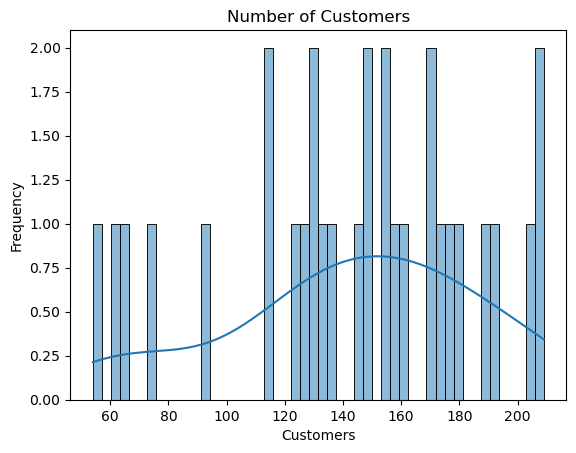

In [31]:
# Explore the data visually
# Create a histogram to show the number of customers 
sns.histplot(df['No_of_customers'], bins = 50, kde = True)
plt.xlabel("Customers")
plt.ylabel("Frequency")
plt.title('Number of Customers')

The graph shows that the number of customers who visit the supermarket during the month range between 50 to 210. This suggests that the supermarket had a varying level of customer traffic throughout the month. Within this range, majority of them fall between 120 to 180. This means that during most days of the month, the supermarket attracted a substantial number of customers within this range.

Text(0.5, 1.0, 'Number of Customers by Period (AM/PM)')

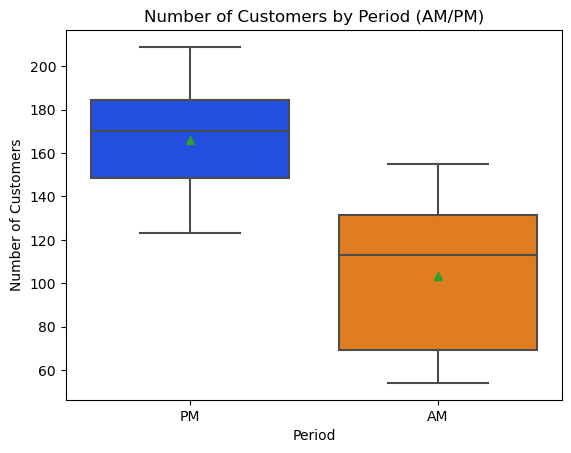

In [32]:
# Create a box plot to show the number of customers by period
sns.boxplot(x='period', y='No_of_customers', showmeans=True, data=df, palette='bright')
plt.xlabel("Period")
plt.ylabel("Number of Customers")
plt.title('Number of Customers by Period (AM/PM)')

The above graph depicts the number of customers by period. Majority of the customers engage in shopping during the PM hours as opposed to AM hours as visible by the median value which is higher in the PM hours (170 vs 113). This indicates that customers tend to favor shopping in the afternoon over morning after their workday finishes. The range is however, broader during the AM hours which indicates that the customers vary quite considerably during these hours as compared to the PM hours. It can also be noticed that the number of customers consistently increase in the afternoon.  

Text(0.5, 1.0, 'Number of Customers by Hour')

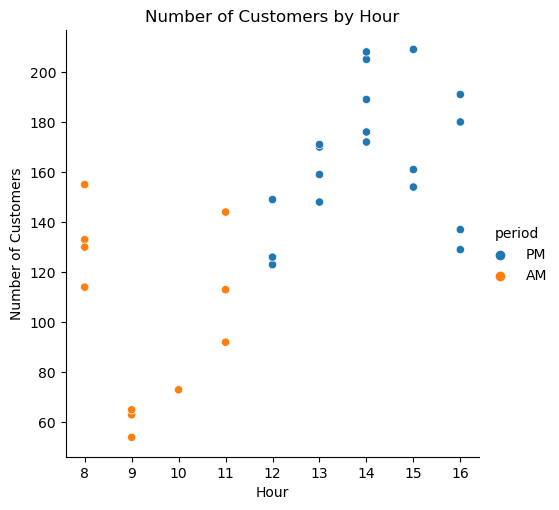

In [33]:
# Create a scatter plot to show the number of customers by hour
sns.relplot(x='hour', y='No_of_customers', hue='period', data=df)
plt.xlabel("Hour")
plt.ylabel("Number of Customers")
plt.title('Number of Customers by Hour')

The above scatter plot illustrates the number of customers by hour. There is a noticeable trend in customer numbers throughout the day. It begins with 8 AM where the number of customers are high (between 110 to 150) and significantly reduces from 9 - 10 AM to between 50 to 70. This fluctuation is mainly due to customers visiting the supermarket to buy breakfast before departing for work. The count increases after 12 PM as the day progresses reaching a peak at 2 PM during lunch hours where the it goes beyond 200 after which it declines steadily. 

Text(0.5, 1.0, 'Number of Customers by Day')

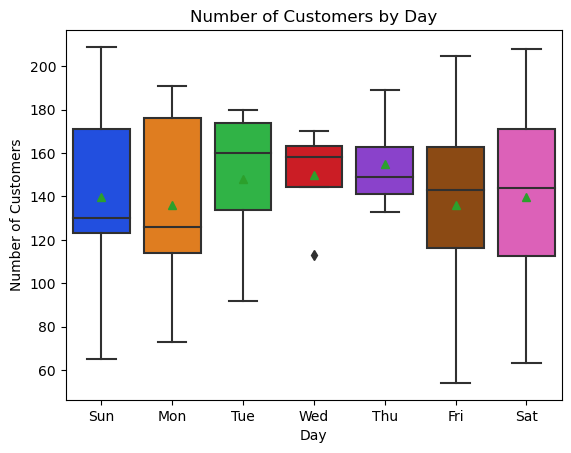

In [34]:
# Create a box plot to show the number of customers by day
sns.boxplot(x='day', y='No_of_customers', showmeans=True, data=df, palette='bright')
plt.xlabel("Day")
plt.ylabel("Number of Customers")
plt.title('Number of Customers by Day')

The graph depicts the number of customers by day. As shown above, majority of the customers who visited the supermarket were on Tuesdays as it has the highest median value (160), closely followed by Wednesdays (158). Both Wednesdays and Thursdays have low ranges as compared to the rest of the days which indicates consistent buying behaviour. However, there seems to be an outlier on Wednesday which signifies low number of customers than average on that particular day. This may possibly be due to an unexpected activity. Additionally, the lowest customer activity level is recorded on Sundays and Mondays where the median tends to be the lowest (130 and below). Moreover, the interquartile ranges of Saturdays, Sundays and Mondays are wider than other days. This suggests significant variation or spread of the number of customers for those days.